In [1]:
# Import Tensorflow 2.0
#tensorflow_version 2.x
import tensorflow as tf 

#! pip install mitdeeplearning
import mitdeeplearning as mdl

import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Check that we are using a GPU, if not switch runtimes
#   using Runtime > Change Runtime Type > GPU
# assert len(tf.config.list_physical_devices('GPU')) > 0

In [2]:
#mnist = tf.keras.datasets.mnist
#Training Fashion MNIST Dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

In [ ]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

In [3]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([

        # TODO: Define the first convolutional layer
        tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation=tf.nn.relu),
        tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation=tf.nn.relu),
        #tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), activation=tf.nn.relu),
        #tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), activation=tf.nn.relu),
        #tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), activation=tf.nn.relu),
        # tf.keras.layers.Conv2D('''TODO''') 

        # TODO: Define the first max pooling layer
        #tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        # tf.keras.layers.MaxPool2D('''TODO''')

        # TODO: Define the second convolutional layer
        #tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation=tf.nn.relu),
        # tf.keras.layers.Conv2D('''TODO''')

        # TODO: Define the second max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        # tf.keras.layers.MaxPool2D('''TODO''')

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        #tf.keras.layers.Dense(128, activation=tf.nn.relu),
        #tf.keras.layers.Dense(128, activation=tf.nn.relu),
        #tf.keras.layers.Dense(128, activation=tf.nn.relu),

        # TODO: Define the last Dense layer to output the classification 
        # probabilities. Pay attention to the activation needed a probability
        # output
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
        # [TODO Dense layer to output classification probabilities]
    ])
    
    return cnn_model
  
cnn_model = build_cnn_model()
# Initialize the model by passing some data through
cnn_model.predict(train_images[[0]])
# Print the summary of the layers in the model.
print(cnn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       36992     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 128)      0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 128)               2359424   
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                        

In [12]:
'''TODO: Define the batch size and the number of epochs to use during training'''
BATCH_SIZE = 64
EPOCHS = 10
learning_rate = 1e-3


In [ ]:
'''TODO: Define the compile operation with your optimizer and learning rate of choice'''
cnn_model.compile(
              optimizer=tf.keras.optimizers.Adamax(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# cnn_model.compile(optimizer='''TODO''', loss='''TODO''', metrics=['accuracy']) # TODO

In [21]:
from datetime import datetime
start_time = datetime.now()
'''TODO: Use model.fit to train the CNN model, with the same batch_size and number of epochs previously used.'''
#callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
history = cnn_model.fit(train_images, train_labels, validation_split = 0.1, batch_size=BATCH_SIZE, epochs=EPOCHS,)# callbacks=[callback], verbose=0)
# cnn_model.fit('''TODO''')
end_time = datetime.now()
#round(cnn_model.optimizer.learning_rate.numpy(), 5)
history.history

Epoch 1/10
844/844 [==============================] - 207s 245ms/step - loss: 0.0035 - accuracy: 0.9993 - val_loss: 0.0023 - val_accuracy: 0.9998
Epoch 2/10
844/844 [==============================] - 220s 260ms/step - loss: 0.0018 - accuracy: 0.9997 - val_loss: 0.0040 - val_accuracy: 0.9993
Epoch 3/10
844/844 [==============================] - 208s 247ms/step - loss: 0.0015 - accuracy: 0.9999 - val_loss: 0.0020 - val_accuracy: 0.9997
Epoch 4/10
844/844 [==============================] - 222s 263ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.0021 - val_accuracy: 0.9997
Epoch 5/10
844/844 [==============================] - 209s 248ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0030 - val_accuracy: 0.9990
Epoch 6/10
844/844 [==============================] - 201s 238ms/step - loss: 4.3606e-04 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 0.9992
Epoch 7/10
844/844 [==============================] - 204s 241ms/step - loss: 4.2308e-04 - accuracy: 0.9999 - val_loss: 

{'loss': [0.003528712783008814,
  0.0017718450399115682,
  0.0014721682528033853,
  0.0021642001811414957,
  0.0014022532850503922,
  0.00043605570681393147,
  0.00042308479896746576,
  0.0013955110916867852,
  0.00035106088034808636,
  0.00011573813389986753],
 'accuracy': [0.9992592334747314,
  0.9997222423553467,
  0.9998703598976135,
  0.9995370507240295,
  0.9996851682662964,
  1.0,
  0.9999259114265442,
  0.9996296167373657,
  0.9999814629554749,
  1.0],
 'val_loss': [0.0022752273362129927,
  0.004046757239848375,
  0.0019815941341221333,
  0.002100132405757904,
  0.0030317376367747784,
  0.0027083968743681908,
  0.007676237728446722,
  0.0036365839187055826,
  0.001865769037976861,
  0.0017172114457935095],
 'val_accuracy': [0.999833345413208,
  0.9993333220481873,
  0.999666690826416,
  0.999666690826416,
  0.9990000128746033,
  0.9991666674613953,
  0.996999979019165,
  0.9993333220481873,
  0.999833345413208,
  0.999666690826416]}

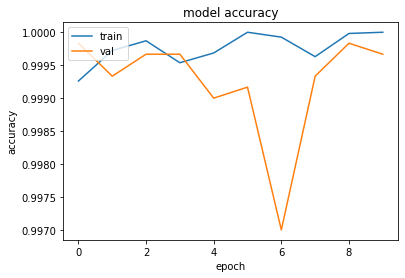

In [23]:
import keras
from matplotlib import pyplot as plt
#history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('akurasi model tanpa scheduler')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [24]:
'''TODO: Use the evaluate method to test the model!'''
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
# test_loss, test_acc = # TODO

print('Test accuracy:', test_acc)
print('Duration: {}'.format(end_time - start_time))

313/313 [==============================] - 15s 49ms/step - loss: 0.5776 - accuracy: 0.9280
Test accuracy: 0.9279999732971191
Duration: 0:35:23.574286


In [27]:
'''TODO: Define learning rate scheduller'''
learning_rate = 1e-3
decay = learning_rate/EPOCHS

'''def scheduler(EPOCHS, learning_rate):
   if EPOCHS < 10:
     return learning_rate
   else:
     return learning_rate * tf.math.exp(-0.1)
'''
'''TODO: Defined as a class to save parameters as attributes'''
class lr_polynomial_decay:
	def __init__(self, epochs=EPOCHS, initial_learning_rate=learning_rate, power=1.0):
		# store the maximum number of epochs, base learning rate,
		# and power of the polynomial
		self.epochs = epochs
		self.initial_learning_rate = initial_learning_rate
		self.power = power
        
	def __call__(self, epoch):
		# compute the new learning rate based on polynomial decay
		decay = (1 - (epoch / float(self.epochs))) ** self.power
		updated_eta = self.initial_learning_rate * decay
		# return the new learning rate
		return float(updated_eta)

In [28]:
curScheduler = lr_polynomial_decay(epochs=EPOCHS, initial_learning_rate=learning_rate, power=1)

'''TODO: Define the compile operation with your optimizer and learning rate of choice'''
cnn_model.compile(
              optimizer='adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#round(cnn_model.optimizer.lr.numpy(), 10)
# cnn_model.compile(optimizer='''TODO''', loss='''TODO''', metrics=['accuracy']) # TODO

In [29]:
from datetime import datetime
start_time = datetime.now()
'''TODO: Use model.fit to train the CNN model, with the same batch_size and number of epochs previously used.'''
callback = tf.keras.callbacks.LearningRateScheduler(curScheduler)
history_scheduler = cnn_model.fit(train_images, train_labels, validation_split = 0.1, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[callback], verbose=0)
# cnn_model.fit('''TODO''')
end_time = datetime.now()
#round(cnn_model.optimizer.learning_rate.numpy(), 5)
history_scheduler.history

{'loss': [0.0038918936625123024,
  0.0001583795965416357,
  0.00010049041156889871,
  7.004917279118672e-05,
  0.0001082146045519039,
  4.0604321839055046e-05,
  2.996419061673805e-05,
  2.313464938197285e-05,
  1.584782512509264e-05,
  1.1141287359350827e-05],
 'accuracy': [0.9990555644035339, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'val_loss': [0.002194023225456476,
  0.0018865769961848855,
  0.001861979835666716,
  0.0024536242708563805,
  0.0017747473903000355,
  0.0019718760158866644,
  0.0023728504311293364,
  0.0023494295310229063,
  0.0027093933895230293,
  0.002570315031334758],
 'val_accuracy': [0.999666690826416,
  0.999833345413208,
  0.9994999766349792,
  0.9991666674613953,
  0.9994999766349792,
  0.9991666674613953,
  0.9991666674613953,
  0.9991666674613953,
  0.9988333582878113,
  0.9991666674613953],
 'lr': [0.001,
  0.0009,
  0.0008,
  0.0007,
  0.0006,
  0.0005,
  0.0004,
  0.0003,
  0.0002,
  1e-04]}

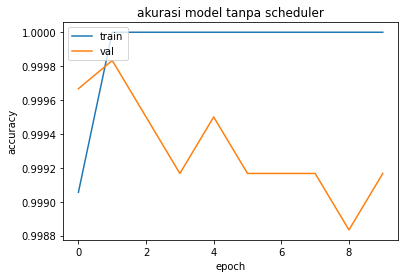

In [30]:
import keras
from matplotlib import pyplot as plt
#history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(history_scheduler.history['accuracy'])
plt.plot(history_scheduler.history['val_accuracy'])
plt.title('akurasi model tanpa scheduler')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [31]:
'''TODO: Use the evaluate method to test the model!'''
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
# test_loss, test_acc = # TODO

print('Test accuracy:', test_acc)
print('Duration: {}'.format(end_time - start_time))

313/313 [==============================] - 12s 39ms/step - loss: 0.7180 - accuracy: 0.9282
Test accuracy: 0.9282000064849854
Duration: 0:33:09.355727
